# Introduction to Machine Learning
### Workshop 3 of DASIL's series on "Data Science with Python"
### Created by Yusen He & Martin Pollack

In this Jupyter notebook we will give you a quick introduction on how to fit machine learning models in Python with the `scikit-learn` package. 

Next week we will go much more into depth.

In [2]:
import pandas as pd
from sklearn import datasets as datasets

## Supervised Learning - Regression

#### Dataset introduction

Remember that in a regression problem the outcome variable is numeric and continuous. However, the predictor variables can either be continuous or discrete.

An example of a regression problem can be found in the diabetes dataset within sklearn. Our outcome is a quantitative measure of disease progression that takes on numbers between 25 and 346.

In [3]:
diabetes = datasets.load_diabetes(as_frame=True)

In [ ]:
print(min(diabetes.target))
print(max(diabetes.target))

25.0
346.0


Let's have a general overview of the predictor variables

In [4]:
diabetes['data']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Here's an overview of the target variable

In [ ]:
diabetes['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

#### Define the predictor variable set and a target



For the regression tasks, a feature set `X` and a target set `y` need to be defined first

In [5]:
X = pd.DataFrame(diabetes['data'])
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
y=pd.DataFrame(diabetes['target'])
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


####Splitting the dataset into Training and Test data

The `sklearn.model_selection.train_test_split` does the random split for the training and testing dataset.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

To evaluate the model performance, we need to randomly split the feature set `X` and the target set `y` into the training set `X_train` & `y_train` and test set `X_test` & `y_test`

The `test_size` option controls the size of the test set. The `random_state` parameter controls the shuffling applied which can be ignored in this work

In [ ]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491
353,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132373,0.003064
281,-0.092695,0.050680,-0.090275,-0.057314,-0.024960,-0.030437,-0.006584,-0.002592,0.024053,0.003064
14,0.045341,-0.044642,-0.025607,-0.012556,0.017694,-0.000061,0.081775,-0.039493,-0.031991,-0.075636
300,0.016281,-0.044642,0.073552,-0.041247,-0.004321,-0.013527,-0.013948,-0.001116,0.042896,0.044485
...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129019,0.056912
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029528,-0.059067
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612
47,-0.078165,-0.044642,-0.073030,-0.057314,-0.084126,-0.074277,-0.024993,-0.039493,-0.018118,-0.083920


In [ ]:
y_train

,target
20,68.0
353,109.0
281,94.0
14,118.0
300,275.0
...,...
323,248.0
192,91.0
117,281.0
47,142.0


In [ ]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.026679,-0.024993,-0.002592,0.003712,0.040343
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070211,0.007207
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,-0.035447,0.070730,-0.039493,-0.034524,-0.009362
...,...,...,...,...,...,...,...,...,...,...
325,-0.001882,-0.044642,0.054152,-0.066495,0.072732,0.056619,-0.043401,0.084863,0.084495,0.048628
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071022,0.048628
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504
68,0.038076,0.050680,-0.029918,-0.040099,-0.033216,-0.024174,-0.010266,-0.002592,-0.012908,0.003064


In [ ]:
y_test

,target
362,321.0
249,215.0
271,127.0
435,64.0
400,175.0
...,...
325,192.0
366,233.0
22,68.0
68,160.0


#### GLM for regression

Set up the multivariate linear regression model. Name is as `regressor_GLM`

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_GLM = LinearRegression()

Fit the linear regression model using function `fit()`

In [ ]:
regressor_GLM.fit(X_train,y_train)

LinearRegression()

Make predictions on test dataset

In [ ]:
GLM_pred = regressor_GLM.predict(X_test)

#### Artificial Neural Network for regression

Set up the artifical neural network model. Name it as `regressor`. Define the number of hidden layers.

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

regressor_ANN_default = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(100,), random_state=1)

Tuning the Parameters in our NN

In [10]:
parameters = {'alpha':[0.001, 0.01, 0.000001], 'hidden_layer_sizes':[(250,1),(100,),(25,1)]}
regressor_ANN_tuned_grid = GridSearchCV(regressor_ANN_default, parameters)

regressor_ANN_tuned_grid.fit(X_train,y_train)
#This is a lot of results
print(regressor_ANN_tuned_grid.cv_results_)
#This is less (but more important)
ANN_pred = regressor_ANN_tuned_grid.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/li

{'mean_fit_time': array([1.43338442, 1.45118532, 1.04068422, 1.43649006, 1.43605719,
       1.00881705, 1.45790262, 1.44951606, 1.22540426]), 'std_fit_time': array([0.02287551, 0.04715732, 0.05415961, 0.0419832 , 0.04394103,
       0.03298572, 0.03930512, 0.06390673, 0.4297317 ]), 'mean_score_time': array([0.00479393, 0.00409708, 0.0041955 , 0.00406179, 0.00384259,
       0.00359306, 0.00371208, 0.00418077, 0.00360365]), 'std_score_time': array([1.63391630e-03, 3.17337927e-04, 2.67468431e-04, 2.90739843e-04,
       1.44897781e-04, 1.11616222e-04, 2.86616816e-05, 8.97837337e-04,
       6.66744537e-05]), 'param_alpha': masked_array(data=[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 1e-06, 1e-06,
                   1e-06],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(250, 1), (100,), (25, 1), (250, 1), (100,), (25, 1),
                   (250

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [11]:
ANN_pred

array([281., 220., 178.,  72., 200., 281.,  72., 202., 200., 200., 200.,
       220.,  71.,  72., 220.,  71., 200.,  72.,  72., 220.,  71., 200.,
       202., 200., 220., 109.,  48.,  72., 200.,  91., 202.,  72., 200.,
       200.,  84., 200.,  91.,  91., 200., 220.,  72., 220., 109., 200.,
       220.,  72.,  72., 200.,  91., 220.,  71.,  71., 200.,  91., 258.,
       220., 220.,  72.,  84., 220., 200., 200.,  91.,  91., 281., 200.,
        72., 220., 220.,  72.,  72.,  91.,  71.,  72.,  71., 220.,  91.,
       220., 220., 109., 109., 220.,  72., 220.,  71.,  72.,  72., 220.,
        72., 202.,  72.,  71.,  72.,  91.,  72.,  72., 281., 109.,  71.,
       202., 200.,  72., 220.,  84., 220.,  91., 220., 220.,  72.,  71.,
       202.])

Fit the ANN model using the input `X_train` and output `y_train`

In [ ]:
regressor_ANN.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(250, 1), random_state=1)

Making predictions on the test set

In [ ]:
ANN_pred = regressor_ANN.predict(X_test)

#### Support Vector Machine Regression

Set up the support vector machine for regression. Name it as `regressor_SVR`. Use `rbf` as the kernel function.

In [ ]:
from sklearn.svm import SVR
# Your code here


Fit the SVR model using the input `X_train` and output `y_train`

In [ ]:
# Your code here


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Make predictions on the test set

In [ ]:
# your code here

#### Performance Assessment

*   Mean Absolute Error
*   Mean Absolute Percentage Error
*   Mean Square Error
*   Root-Mean-Square Error

First, let's compute Mean Absolute Error (MAE) for predictions

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE_GLM = mean_absolute_error(y_test, GLM_pred)
MAE_SVR = mean_absolute_error(y_test, SVR_pred)
MAE_ANN = mean_absolute_error(y_test, ANN_pred)

print("The MAE of predictions provided by GLM is :")
print(MAE_GLM)

print("The MAE of predictions provided by SVR is :")
print(MAE_SVR)

print("The MAE of predictions provided by ANN is :")
print(MAE_ANN)


The MAE of predictions provided by GLM is :
45.120987683251
The MAE of predictions provided by SVR is :
52.45903046955925
The MAE of predictions provided by ANN is :
53.306306306306304


Second, let's compute Mean Absolute Percentage Error (MAPE) for predictions

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_GLM = mean_absolute_percentage_error(y_test, GLM_pred)
MAPE_SVR = mean_absolute_percentage_error(y_test, SVR_pred)
MAPE_ANN = mean_absolute_percentage_error(y_test, ANN_pred)

print("The MAPE of predictions provided by GLM is :")
print(MAPE_GLM)

print("The MAPE of predictions provided by SVR is :")
print(MAPE_SVR)

print("The MAPE of predictions provided by ANN is :")
print(MAPE_ANN)

The MAPE of predictions provided by GLM is :
0.37961401187552524
The MAPE of predictions provided by SVR is :
0.4218772291282973
The MAPE of predictions provided by ANN is :
0.3592407768614211


Third, let's compute Mean Square Error (MSE) for predictions

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_GLM = mean_squared_error(y_test, GLM_pred)
MSE_SVR = mean_squared_error(y_test, SVR_pred)
MSE_ANN = mean_squared_error(y_test, ANN_pred)

print("The MSE of predictions provided by GLM is :")
print(MSE_GLM)

print("The MSE of predictions provided by SVR is :")
print(MSE_SVR)

print("The MSE of predictions provided by ANN is :")
print(MSE_ANN)

The MSE of predictions provided by GLM is :
3180.1988368427265
The MSE of predictions provided by SVR is :
4277.196345895227
The MSE of predictions provided by ANN is :
5218.369369369369


Last, let's compute Root-Mean-Suqare-Error (RMSE) for predictions

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE_GLM = mean_squared_error(y_test, GLM_pred, squared=False)
RMSE_SVR = mean_squared_error(y_test, SVR_pred, squared=False)
RMSE_ANN = mean_squared_error(y_test, ANN_pred, squared=False)

print("The RMSE of predictions provided by GLM is :")
print(RMSE_GLM)

print("The RMSE of predictions provided by SVR is :")
print(RMSE_SVR)

print("The RMSE of predictions provided by ANN is :")
print(RMSE_ANN)

The RMSE of predictions provided by GLM is :
56.39325169594964
The RMSE of predictions provided by SVR is :
65.4002778732264
The RMSE of predictions provided by ANN is :
72.23828188273424


## Supervised Learning - Classification

#### Dataset Introduction

Now let's look at a classification problem, where the outcome can only take on 2 or more discrete values. But of course our predictors can be either continuous or discrete.

Now we use `scikit-learn`'s breast cancer dataset. Here the outcome can take on a 0, for no breast cancer, or 1, for breast cancer. 

So in this case we actually have a *binary classification* problem, meaning our category can only take on 2 discrete values. In most binary classification problems, like in this case, the categories are 0 and 1 indiciating the presence or absence of some trait.

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)

In [ ]:
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Define the predictor variable set and a target


For the regression tasks, a feature set `X` and a target set `y` need to be defined first

In [ ]:
X = pd.DataFrame(breast_cancer['data'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = pd.DataFrame(breast_cancer['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


####Split the dataset into training and test set

The `sklearn.model_selection.train_test_split` does the random split for the training and testing dataset.

Note: Here, `stratify` means the test set has equal numbers of 0 & 1.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y,  random_state=0)

To evaluate the model performance, we need to randomly split the feature set `X` and the target set `y` into the training set `X_train` & `y_train` and test set `X_test` & `y_test`

The `test_size` option controls the size of the test set. The `random_state` parameter controls the shuffling applied which can be ignored in this work

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
246,13.20,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.11010,0.15080,0.22980,0.04970,0.2767,0.07198
232,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,0.07077,...,17.46,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.113800,0.085340,0.2001,0.06467,...,16.11,18.33,105.90,762.6,0.13860,0.28830,0.19600,0.14230,0.2590,0.07779
262,17.29,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,0.2108,0.05464,...,20.39,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,...,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
166,10.80,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
342,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,11.92,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080
445,11.99,24.89,77.61,441.3,0.10300,0.09218,0.054410,0.042740,0.1820,0.06850,...,12.98,30.36,84.48,513.9,0.13110,0.18220,0.16090,0.12020,0.2599,0.08251


In [ ]:
y_train

,target
246,1
232,1
15,0
128,1
262,0
...,...
82,0
166,1
342,1
445,1


In [ ]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
460,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,...,22.960,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,14.490,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067
62,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,0.1949,0.07292,...,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320
485,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,13.780,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340
370,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.380,31.03,129.30,1165.0,0.14150,0.46650,0.70870,0.22480,0.4824,0.09614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.310,20.54,102.30,777.5,0.12180,0.15500,0.12200,0.07971,0.2525,0.06827
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.990,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
150,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,...,14.160,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
511,14.81,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,0.1659,0.05348,...,15.610,17.58,101.70,760.2,0.11390,0.10110,0.11010,0.07955,0.2334,0.06142


In [ ]:
y_test

,target
460,0
135,0
62,0
485,1
370,0
...,...
434,1
100,0
150,1
511,1


####Naive Bayes for Binary Classification

Set up the Naive Bayes model. Name it as `classifier_NB`. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB

GaussianNB()

Fit the Naive Bayes model using the input `X_train` and output `y_train`



In [ ]:
classifier_NB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Make predictions on the test dataset

In [ ]:
NB_pred = classifier_NB.predict(X_test)

####K-Nearest Neighbor for Binary Classification

Set up the K-Nearest Neighbor model. Name it as `classifier_knn`. In this workshop, let's set up three nearest neighbors for `n_neighbors`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_knn

KNeighborsClassifier(n_neighbors=3)

Fit the K-Nearest Neighbor model using the input `X_train` and output `y_train`

In [ ]:
classifier_knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Make predictions on test dataset

In [ ]:
KNN_pred = classifier_knn.predict(X_test)

####Logistic Regression for Binary Classification

Set up the Logistic Regression model. Name it as `classifier_LR`. 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state=0)
classifier_LR

LogisticRegression(random_state=0)

Fit the Logistic Regression model using the input `X_train` and output `y_train`



In [ ]:
classifier_LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

Make predictions on test dataset

In [ ]:
LR_pred = classifier_LR.predict(X_test)
LR_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

####Decision Tree for Binary Classification

Set up the Logistic Regression model. Name it as `classifier_DT`. 

In [ ]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier()
classifier_DT

DecisionTreeClassifier()

Fit the Logistic Regression model using the input `X_train` and output `y_train`


In [ ]:
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier()

Make predictions on test dataset

In [ ]:
DT_pred = classifier_DT.predict(X_test)
DT_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

####Random Forest for Binary Classification

Set up the Random Forest model. Name it as `classifier_RF`. Also, the maximum depth of the trees are set as 2 by `max_depth`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(max_depth=2, random_state=0)
classifier_RF

RandomForestClassifier(max_depth=2, random_state=0)

Fit the Random Forest model using the input `X_train` and output `y_train`


In [ ]:
classifier_RF.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=2, random_state=0)

Make predictions on test dataset

In [ ]:
RF_pred = classifier_RF.predict(X_test)
RF_pred 

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

####XGBoost for Binary Classification

Set up the XGBoost model. Name it as `classifier_XGB`

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
classifier_XGB

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

Fit the XGBoost model using the input `X_train` and output `y_train`


In [ ]:
classifier_XGB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

Make predictions on test dataset

In [ ]:
XGB_pred = classifier_XGB.predict(X_test)
XGB_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

####Support Vector Machine for Binary Classification

Set up the SVM model. Name it as `classifier_SVM`

In [ ]:
from sklearn.svm import SVC
classifier_SVM = SVC(gamma='auto')
classifier_SVM

SVC(gamma='auto')

Fit the SVM model using the input `X_train` and output `y_train`


In [ ]:
classifier_SVM.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

Make predictions on test dataset

In [ ]:
SVM_pred = classifier_SVM.predict(X_test)
SVM_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

####Artificial Neural Network for Binary Classification

Set up the ANN model. Name it as `classifier_ANN`. Set up the hidden as 1 and hidden nodes within the hidden layer as 100 by using `hidden_layer_sizes`

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier_ANN = MLPClassifier(hidden_layer_sizes=(100,1))
classifier_ANN

MLPClassifier(hidden_layer_sizes=(100, 1))

Fit the ANN model using the input `X_train` and output `y_train`



In [ ]:
classifier_ANN.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(100, 1))

Make predictions on test dataset

In [ ]:
ANN_pred = classifier_ANN.predict(X_test)
ANN_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

####Performance Assessment

*   Accuracy
*   Sensitivity
*   Specificity
*   AUC

First, let's compute the confusion matrix for predictions

For example: for Naive Bayes's prediction, we have:

In [ ]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cmNB = confusion_matrix(y_test,NB_pred)
print('Confusion Matrix for Naive Bayes: \n', cmNB)
#Compute total test cases
totalNB=sum(sum(cmNB))
#####from confusion matrix calculate accuracy
accuracyNB=(cmNB[0,0]+cmNB[1,1])/totalNB
print ('Accuracy for Naive Bayes: ', accuracyNB)

sensitivityNB = cmNB[0,0]/(cmNB[0,0]+cmNB[0,1])
print('Sensitivity for Naive Bayes: ', sensitivityNB)

specificityNB = cmNB[1,1]/(cmNB[1,0]+cmNB[1,1])
print('Specificity for Naive Bayes: ', specificityNB)

Confusion Matrix for Naive Bayes: 
 [[ 57   7]
 [  6 101]]
Accuracy for Naive Bayes:  0.9239766081871345
Sensitivity for Naive Bayes:  0.890625
Specificity for Naive Bayes:  0.9439252336448598


Your code here:

Then, we compute the AUC. We use the `roc_auc_score` from `sklearn`

In [ ]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the Naive Bayes classifier
NB_prob = classifier_NB.predict_proba(X_test)

#We compute the AUC score
aucNB = roc_auc_score(y_test,NB_prob[:,1])
print('AUC for Naive Bayes: ', aucNB)

AUC for Naive Bayes:  0.9767815420560748


Your code here

## Unsupervised Learning - Clustering

#### Dataset Introduction

Lastly we want to consider an unsupervised learning problem, where we don't actually have an outcome at all, or our data is "unlabeled." Instead of predicting something we just want to find patterns and structure in our data.

Our data can be unlabeled for two reasons:

• First, maybe our data does not have well-defined groupings. An example might be a company's customers: there are not clear and distinct groups that we can put people in. 

• Second, maybe the label of our data is missing. Suppose you are a wine vendor and you ordered three types of wine from your supplier. When you receive your wine shipment, however, you realize that the labels were not put on. You may want to learn about how the different wine bottles are related to one another to make an educated guess on which is what wine type.

Our example below falls in this second case.

In [ ]:
wine = datasets.load_wine(as_frame=True)

In [ ]:
wine.data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Initialize the dataset

Initialize the dataset as `X`

In [ ]:
X= wine.data

####Clustering using K-Means algorithm

#####Intialize the K-Means Algorithm

The K-Mean algorithm is included in the Scikit-leanr library. Define the number of clusters by `n_clusters` and random initialization state.

In [ ]:
from sklearn.cluster import KMeans
#Here we set n=3 in this workshop
cluster_KMeans = KMeans(n_clusters =3, random_state=0)
cluster_KMeans

KMeans(n_clusters=3, random_state=0)

##### Fit and predict using K-Mean algorithm



Fit the dataset

In [ ]:
cluster_KMeans.fit(X)

KMeans(n_clusters=3, random_state=0)

Prediction

In [ ]:
cluster_labels = cluster_KMeans.predict(X)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

Each data point in `X` is now assigned with a label.

In [ ]:
X['label']=cluster_labels
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,0


Compute inner cluster distances (Euclidean distances) within all clusters

In [ ]:
cluster_KMeans.inertia_

2370689.686782969

##### Find the BEST k

Now, let's try different numbers of k to see how cluster centers change

In [ ]:
#Store the sum of inner cluster distances in a list and name is as dist
dist=[]

for i in range(1,10):
  #Run k-mean clustering with i centers
  cluster_KMeans = KMeans(n_clusters =i+1, random_state=0)
  cluster_KMeans.fit(X)
  #Store the summed inner cluster distances into the list namely 'dist'
  dist.append(cluster_KMeans.inertia_)

Display the inner cluster distances for all k

In [ ]:
dist

[4543877.621627203,
 2370689.686782969,
 1331920.430684771,
 916415.1871539169,
 647362.0020260848,
 412137.5091004584,
 324553.044355034,
 270954.9292415376,
 217887.37856033302]

Now, let's use `matplotlib` library to visualize the inner cluster distances

In [ ]:
import matplotlib.pyplot as plt

We can plot the inner cluster distance curve and use Elbow's method to seek for optimal k

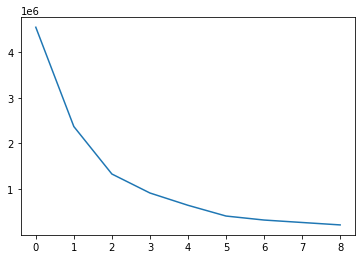

In [ ]:
plt.plot(dist)
plt.show()

####Compute the Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score
#Store the Silhouette Coefficient in a list and name is as distS
distS=[]

for i in range(1,20):
  #Run k-mean clustering with i centers
  cluster_KMeans = KMeans(n_clusters =i+1, random_state=0)
  cluster_KMeans.fit(X)

  #Obtain the clustering labels
  cluster_labels = cluster_KMeans.predict(X)
  
  #Compute the 
  silhouette_avg = silhouette_score(X, cluster_labels)

  #Store the Silhouette Coefficient into the list namely 'distS'
  distS.append(silhouette_avg)

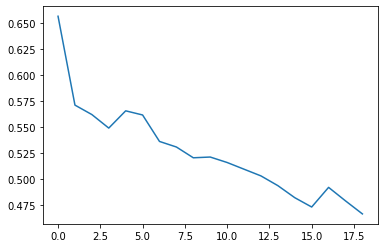

In [ ]:
plt.plot(distS)
plt.show()

####Clustering with DBSCAN algorithm

#####Initialize the DBSCAN algorithm

The DBSCAN algorithm is included in the Scikit-leanr library. Define the radius factor by `eps` and minimum samples per cluster.

In [ ]:
from sklearn.cluster import DBSCAN
#DBSCAN set up with hyperparameters
cluster_DBSCAN = DBSCAN(eps=5, min_samples=2)
cluster_DBSCAN

DBSCAN(eps=5, min_samples=2)

#####Fit & predict using the DBSCAN algorithm

Drop the labels from DBSCAN algorithm

In [ ]:
X = X.drop(columns=['label'])

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Fit the dataset

In [ ]:
cluster_DBSCAN.fit(X)

DBSCAN(eps=5, min_samples=2)

Prediction

In [ ]:
cluster_DBSCAN.fit_predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  3, -1, -1, -1, -1, -1,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        3,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6,
       -1, -1, -1,  7,  4, -1,  7, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1,
        6, -1, -1, -1,  8,  8,  8, -1, -1, -1, -1, -1, -1,  9, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1, -1, 10, -1, -1, 11, -1,
       -1, -1, -1, -1, 11, -1, -1,  9])

What clusters are computed by?

In [ ]:
DBSCAN_clusters = set(cluster_DBSCAN.fit_predict(X))
DBSCAN_clusters

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

How many clusters in total?

In [ ]:
len(DBSCAN_clusters)

13

Each data point in `X` is now assigned with a label.

In [ ]:
X['label']=cluster_DBSCAN.fit_predict(X)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,-1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,-1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,-1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,-1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,-1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,11
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,-1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,-1
